In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

# Project 3: Michaelis-Menten Kinetics

The aim is to fit the Michaelis-Menten equation to measured Enzyme Kinetics data:
$$
v=\frac{v_\mathrm{max} \cdot c}{K_\mathrm{m} + c}
$$

First, we load the data and plot it:

In [18]:
conc, v1, v2, v3, v4, v5 = np.loadtxt('data_MM.csv',skiprows=1,delimiter=',',unpack=True)

rates = np.array([v1, v2, v3, v4, v5])

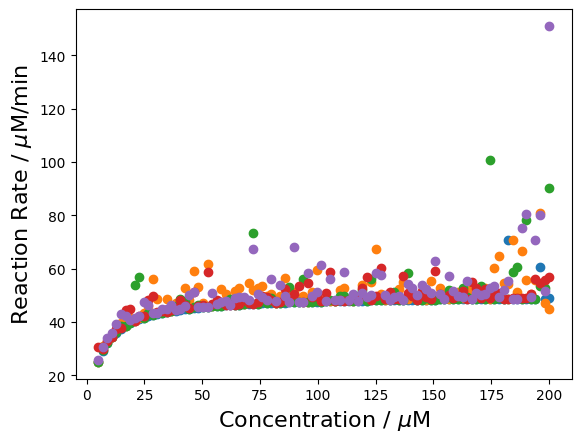

In [19]:
plt.scatter(conc,v1)
plt.scatter(conc,v2)
plt.scatter(conc,v3)
plt.scatter(conc,v4)
plt.scatter(conc,v5)

#plt.xticks([1.00e-05, 3.25e-05, 5.50e-05, 7.75e-05, 1.00e-04],['0.01', '0.033', '0.055', '0.078', '0.1'])

plt.xlabel(r'Concentration / $\mu$M',fontsize=16)
plt.ylabel(r'Reaction Rate / $\mu$M/min',fontsize=16)

plt.show()

Now we can calculate the mean and standard deviation and fit the data with the Michaelis-Menten equation. because this is a non-linear fit, we need to guess initial values. For $v_\mathrm{max}$ this should be around 50 (where the data converges to in the high-conc limit) and for $K_\mathrm{m}$ it will be around 10 (roughly where half the maximum rate is achieved).

In [20]:
#calculate mean and standard deviation
mean_rate = np.mean(rates,axis=0)
std_rate  = np.std(rates,axis=0)

In [21]:
def Michaelis_Menten(c,vmax,Km):
    return (vmax*c)/(Km+c)

popt, pcov = curve_fit(Michaelis_Menten, conc, mean_rate, 
                       p0=(50,10), sigma=std_rate)

Now we can look at the resulting parameters:

In [22]:
vmax,Km = popt 
sig_vmax,sigKm = np.sqrt(np.diag(pcov))

print(f"---Maximum Rate:")
print(f"v_max = {vmax:10.2f} +/- {sig_vmax:10.2f} uM/min")
print(f"---Michaelis Constant:")
print(f"Km    = {Km:10.2f} +/- {sigKm:10.2f} uM")

---Maximum Rate:
v_max =      50.34 +/-       0.09 uM/min
---Michaelis Constant:
Km    =       4.75 +/-       0.12 uM


Finally, let's look at the plot:

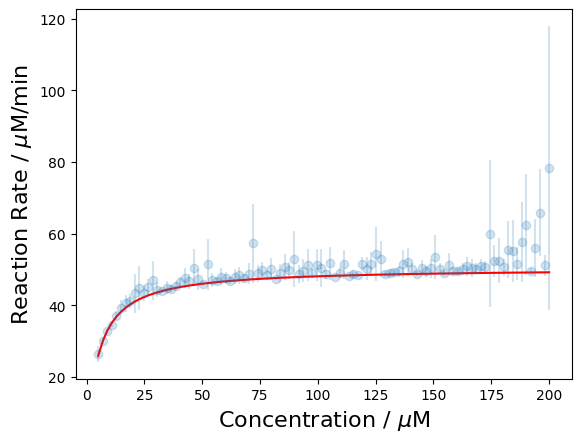

In [23]:
plt.errorbar(conc,mean_rate,yerr=std_rate,fmt='o',alpha=0.2)
plt.plot(conc,Michaelis_Menten(conc,vmax,Km),color='r')

plt.xlabel('Time / h',fontsize=16)
plt.ylabel('Amount of Thorium / M',fontsize=16)

plt.xlabel(r'Concentration / $\mu$M',fontsize=16)
plt.ylabel(r'Reaction Rate / $\mu$M/min',fontsize=16)

#plt.xlim([0,1000])
#plt.ylim([0,5.2])

plt.show()